In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# 加载数据
data = pd.read_csv('yelp_feature.csv')
print('dataset shape {}'.format(data.shape))
data.head()
header=data.columns.values.tolist()
print(header)
print(len(header))


dataset shape (1048575, 6)
['average_stars', 'elite_count', 'fans', 'friends_count', 'business_average_stars', 'stars']
6


In [5]:
header=data.columns.values.tolist()
print(header)

['average_stars', 'elite_count', 'fans', 'friends_count', 'business_average_stars', 'stars']


In [18]:
X = data.drop(['stars'], axis=1)
X=X.ix[0:20000]
y=data['stars']
y=y.ix[0:20000]
print('shape of X {}; shape of Y {}'.format(X.shape, y.shape))

shape of X (20001, 5); shape of Y (20001,)


/Users/yuningsong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/yuningsong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [19]:
#划分为训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2);

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  

In [12]:
y_pred = model.predict(X_test)  

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))  

[[20643  3028  2616   707   435]
 [ 4949  9188  4514   893   309]
 [ 4471  7953 29260  6408  1282]
 [ 2061  2715 15750 25848  3451]
 [ 2503  1819  6307 10909 41696]]
             precision    recall  f1-score   support

          1       0.60      0.75      0.67     27429
          2       0.37      0.46      0.41     19853
          3       0.50      0.59      0.54     49374
          4       0.58      0.52      0.55     49825
          5       0.88      0.66      0.76     63234

avg / total       0.63      0.60      0.61    209715



In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

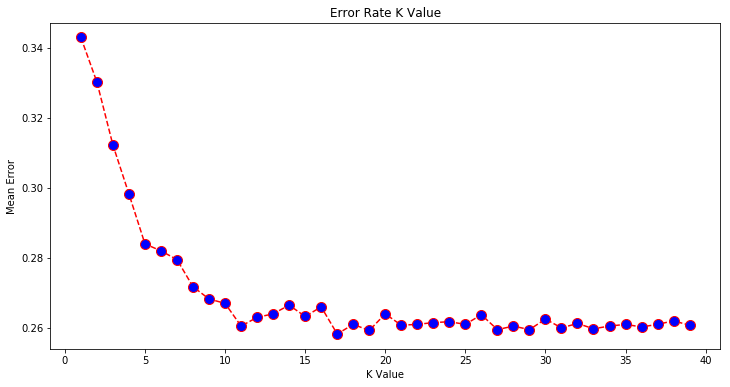

In [21]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [22]:
X = data.drop(['stars'], axis=1)

y=data['stars']

print('shape of X {}; shape of Y {}'.format(X.shape, y.shape))

shape of X (1048575, 5); shape of Y (1048575,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2);

In [26]:
#使用普通的KNN，带权值的knn算法以及指定半径的knn
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# models = []
#指定3个模型

model=KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.6684834179720096


In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = model.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))  

[[19905  2846  2858   845   885]
 [ 3093  9518  5555  1037   671]
 [ 2664  3344 32457  8458  2490]
 [  832   849 10721 31139  6264]
 [ 1123   630  4341 10018 47172]]
             precision    recall  f1-score   support

          1       0.72      0.73      0.72     27339
          2       0.55      0.48      0.51     19874
          3       0.58      0.66      0.62     49413
          4       0.60      0.63      0.61     49805
          5       0.82      0.75      0.78     63284

avg / total       0.67      0.67      0.67    209715



In [29]:
from sklearn.externals import joblib

# 保存模型到 model.joblib 文件
joblib.dump(model, "knn_model.joblib" ,compress=1)

['knn_model.joblib']

In [30]:
from sklearn.metrics import mean_absolute_error 

In [35]:
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended; for illustration only. 
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """

   # y_true, y_pred = check_array(Y_test, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
mean_absolute_percentage_error(Y_test, y_pred)

18.446773001454357